In [159]:
from fipy import *

Moorcrfot & Lewis (1999) proposal:

$$ 0 = \nabla^2 u - \beta\nabla.(u\vec{x}) $$ (1)

Reducing to 1-D
$$ \frac{du}{dt} = \frac{d^2 u}{d x} - \beta\frac{d(u\vec{x})}{dx} $$  (2)

Let start to solve equation (2)

In [187]:
# Values
nx = 10
dx = 1.
mesh = Grid1D(nx=nx, dx=dx)
x = mesh.cellCenters[0]
xu = numerix.linspace(0, 100)

In [188]:
# Setting variable which retain our result
phi = CellVariable(name="solution variable", mesh=mesh, value=0.)
# Add inital condition
phi.setValue(1., where=(4 < x) & (6 > x))

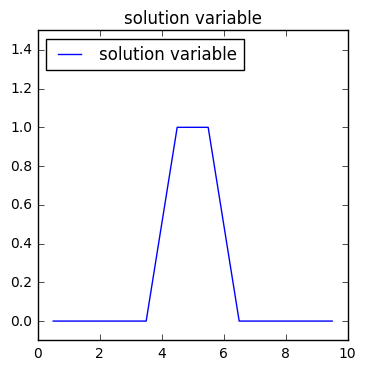

In [189]:
# Plotting inicial conditions
if __name__ == '__main__':
    viewer = Viewer(vars=phi, datamin=-0.1, datamax=1.5)
    viewer.plot()

In [190]:
# Setting Difussion and advection coefficients
D = 1.
C = (0.1, )

In [194]:
# Equation with transientterm
eqX = TransientTerm() == DiffusionTerm(coeff=D) - \
                         ConvectionTerm(coeff=C)

I can not any vector function or element $ \vec{x} $ inside Convection term. How can do it?

In [192]:
# Solving the PDE
# time steps
timeStepDuration = 0.1
steps = 100
t = timeStepDuration * steps
# solve
for step in range(steps):
    eqX.solve(var=phi, dt=timeStepDuration)

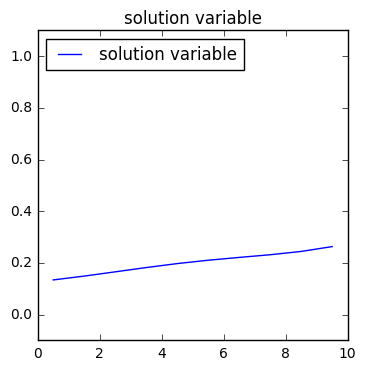

In [193]:
# Plotting results
if __name__ == '__main__':
    viewer = Viewer(vars=phi, datamin=-0.1, datamax=1.1)
    viewer.plot()